In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [16]:
df=pd.read_csv('Datasets/colleges.csv')
df.head()
df.dropna()

,College Name,Rank,Branch
0,"College of Engineering, Pune",42,Computer
1,"College of Engineering, Pune",56,Computer
2,"College of Engineering, Pune",61,Computer
3,"College of Engineering, Pune",74,Computer
4,"College of Engineering, Pune",79,Computer
...,...,...,...
821,Dr. D. Y. Patil Unitech Society's Dr. D. Y. Pa...,129654,Civil
822,Kavikulguru Institute of Technology and Scienc...,130263,Civil
823,Kavikulguru Institute of Technology and Scienc...,131269,Civil
824,Kavikulguru Institute of Technology and Scienc...,132658,Civil


# Label Encoding

In [17]:
colg=np.unique(df['College Name'])
print(colg)
print(len(df))
print(len(colg))

['AISSMS College of Engineering, Pune'
 "All India Shri Shivaji Memorial Society's Institute of Information Technology,Pune"
 "Bharati Vidyapeeth's College of Engineering,Lavale, Pune"
 "Bharatiya Vidya Bhavan's Sardar Patel College of Engineering Mumbai"
 "Bharatiya Vidya Bhavan's Sardar Patel College of Engineering, Mumbai"
 'College of Engineering, Pune'
 'Cummins College of Engineering for Women, Pune'
 "Dr. D. Y. Patil Pratishthan's D.Y.Patil College of Engineering Akurdi, Pune"
 "Dr. D. Y. Patil Unitech Society's Dr. D. Y. Patil Institute of Technology, Pimpri, Pune"
 'Dwarkadas J. Sanghvi College of Engineering, Mumbai'
 'Fr. C. Rodrigues Institute of Technology, Navi Mumbai'
 'GH Raisoni College of Engineering, Nagpur'
 'Government College of Engineering, Amravati'
 'Government College of Engineering, Aurangabad'
 'Government College of Engineering, Chandrapur'
 'Government College of Engineering, Karad'
 'Government College of Engineering, Nagpur'
 'Indira College of Engineeri

In [18]:
code=[]
for i in range(len(colg)):
    code.append(i)

df['College Name'] = df['College Name'].replace(colg,code)
bak_college = np.array(df['College Name'])
df.head()

,College Name,Rank,Branch
0,5,42,Computer
1,5,56,Computer
2,5,61,Computer
3,5,74,Computer
4,5,79,Computer


In [19]:
branch=np.unique(df['Branch'])
print(branch)
print(len(df))
print(len(branch))

['Civil' 'Computer' 'EnTC' 'IT' 'Mechanical']
826
5


In [20]:
code=[]
for i in range(len(branch)):
    code.append(i)

df['Branch'] = df['Branch'].replace(branch,code)
bak_college = np.array(df['Branch'])
df.head()

,College Name,Rank,Branch
0,5,42,1
1,5,56,1
2,5,61,1
3,5,74,1
4,5,79,1


In [21]:
X = df.drop(columns=["College Name"])
Y = df['College Name']

C:\Users\Admin\AppData\Local\Temp\ipykernel_6216\1450998898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rank'])


<AxesSubplot: xlabel='Rank', ylabel='Density'>

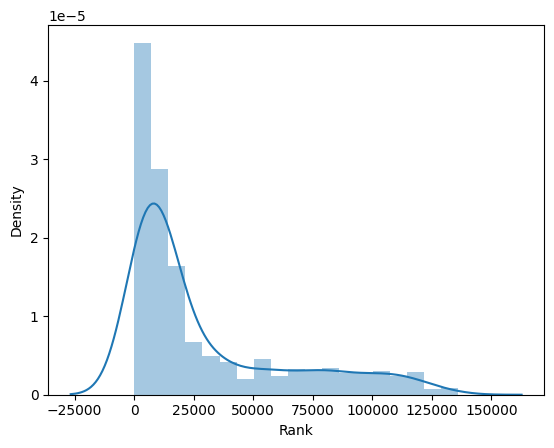

In [22]:
sns.distplot(df['Rank'])

# Classifiers

In [23]:
#Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=40, random_state=36)

# clf = DecisionTreeClassifier()
# clf.fit(X_train,y_train)

# preddt = clf.predict(X_test)

# accuracy = clf.score(X_test,y_test)
# accuracy = eval("%0.2f"%accuracy)*100
# print("Algorithm Score: ",accuracy,"%")



# XGB Classifier
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=20,random_state=36)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)



# SVM
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=0.05, random_state=36)

# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# clf = SVC(kernel='linear')
# clf.fit(X_train_resampled, y_train)

# y_pred = clf.predict(X_test)

# accuracy = clf.score(X_test, y_test)
# print("Accuracy: ", accuracy)



# Random Forest
# from sklearn.ensemble import RandomForestClassifier

# X_train, X_test, y_train, y_test = train_test_split(X.values, Y, test_size=50, random_state=36)

# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# accuracy = clf.score(X_test, y_test)
# print("Accuracy: ", accuracy)

Accuracy:  0.8


In [24]:
col = ['Rank','Branch']
print(col)

['Rank', 'Branch']


# User input

In [25]:
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

usrip

[2465, 1]

# Filtering dataset

In [26]:
filtered_df = df[(df['Branch'] == usrip[1])]
# print(len(filtered_df))

filtered_colg=np.unique(filtered_df['College Name'])
print(len(filtered_colg))
print(colg[filtered_colg])

39
['AISSMS College of Engineering, Pune'
 "All India Shri Shivaji Memorial Society's Institute of Information Technology,Pune"
 "Bharati Vidyapeeth's College of Engineering,Lavale, Pune"
 "Bharatiya Vidya Bhavan's Sardar Patel College of Engineering, Mumbai"
 'College of Engineering, Pune'
 'Cummins College of Engineering for Women, Pune'
 "Dr. D. Y. Patil Pratishthan's D.Y.Patil College of Engineering Akurdi, Pune"
 "Dr. D. Y. Patil Unitech Society's Dr. D. Y. Patil Institute of Technology, Pimpri, Pune"
 'Dwarkadas J. Sanghvi College of Engineering, Mumbai'
 'Fr. C. Rodrigues Institute of Technology, Navi Mumbai'
 'GH Raisoni College of Engineering, Nagpur'
 'Government College of Engineering, Amravati'
 'Government College of Engineering, Aurangabad'
 'Government College of Engineering, Karad'
 'Government College of Engineering, Nagpur'
 "Jaywant Shikshan Prasarak Mandal's,Rajarshi Shahu College of Engineering"
 "K. E. Society's Rajarambapu Institute of Technology, Kolhapur"
 'K. 

In [27]:
X_filtered = filtered_df.drop(columns=["College Name"])
Y_filtered = filtered_df['College Name']



#Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered.values, Y_filtered, test_size=20)

# clfdt = DecisionTreeClassifier()
# clfdt.fit(X_train_filtered, y_train_filtered)

# preddt = clfdt.predict(X_test_filtered)

# accuracy_ft = clfdt.score(X_test_filtered, y_test_filtered)
# accuracy_ft = eval("%0.2f"%accuracy_ft)*100
# print("Algorithm Score: ",accuracy_ft,"%")
# print("Accuracy: ", accuracy_ft)



# XGB
from xgboost import XGBClassifier
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered.values, Y_filtered, test_size=20,random_state=36)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_filtered = le.fit_transform(y_train_filtered)

clfdt = XGBClassifier()
clfdt.fit(X_train_filtered, y_train_filtered)

y_pred_filtered = clf.predict(X_test_filtered)

accuracy_ft = clfdt.score(X_test_filtered, y_test_filtered)
# accuracy_ft = eval("%0.2f"%accuracy)*100
# print("Algorithm Score: ",accuracy_ft,"%")
# print("Accuracy: ", accuracy_ft)



# SVM
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered.values, Y_filtered, test_size=20)

# clf = SVC(kernel='linear')
# clf.fit(X_train_filtered, y_train_filtered)

# y_pred = clf.predict(X_test_filtered)

# accuracy_ft = clf.score(X_test_filtered, y_test_filtered)
# accuracy_ft = eval("%0.2f"%accuracy)*100
# print("Algorithm Score: ",accuracy_ft,"%")
# print("Accuracy: ", accuracy_ft)




# Random Forest
# from sklearn.ensemble import RandomForestClassifier

# X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered.values, Y_filtered, test_size=20)

# clfdt = RandomForestClassifier()
# clfdt.fit(X_train_filtered, y_train_filtered)

# y_pred = clfdt.predict(X_test_filtered)

# accuracy = clfdt.score(X_test_filtered, y_test_filtered)
# accuracy_ft = eval("%0.2f"%accuracy)*100
# print("Algorithm Score: ",accuracy_ft,"%")
# print("Accuracy: ", accuracy_ft)

# Prediction

In [28]:
userpreddt = clfdt.predict([usrip])
print(userpreddt)
op = filtered_colg[userpreddt]
print("You may have chance to get entrance in: ",colg[op])

[27]
You may have chance to get entrance in:  ['Pimpri Chinchwad College of Engineering, Pune']
